# Análisis de ventas

A continuación crearemos los dataframes necesarios para obtener la información de interes para el administrador.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importamos los archivos csv originales

df = pd.read_csv('material.csv')
columns = pd.read_csv('columns.csv')
df.columns

Index(['Unnamed: 0', 'foliointerno', '_id', 'Usuario.razonSocial',
       'Productos.idLocal', 'Productos.unidades', 'Productos.cantidad',
       'Productos.importe', 'Especificaciones.estructura',
       'Especificaciones.tipo', 'Especificaciones.calibreECT',
       'Especificaciones.caraExterior', 'Especificaciones.largo',
       'Especificaciones.ancho', 'Especificaciones.alto',
       'Especificaciones.tipoUnion', 'Especificaciones.suaje',
       'Productos.precioUnitario', 'precios.precioGeneralm2', 'fechaEmision',
       'Especificaciones.longitudLamina', 'Especificaciones.anchoLamina',
       'areaM2', 'precioListaMillares'],
      dtype='object')

In [3]:
# Para poder utilizar la columna 'fechaEmision' como un indice debemos convertirla a un formato de fecha

df['fechaEmision'] = pd.to_datetime(df['fechaEmision'])

In [4]:
# Realizamos la agrupación por usuario, el año de venta y sumando la cantidad total de unidades vendidas.

ventasCliente = df.groupby(['Usuario.razonSocial', df['fechaEmision'].dt.year])['Productos.cantidad'].sum()
ventasCliente

Usuario.razonSocial                    fechaEmision
CREMERIA COVADONGA S.A. DE C.V.        2017             40.000
                                       2018            170.000
                                       2019            170.000
                                       2020            150.000
Intermuebles Modulares, S.A. de C.V.   2019              0.300
                                       2020             20.425
Invernaderos de Zitácuaro, S. de R.L.  2017              8.000
                                       2018             16.000
                                       2019             16.000
                                       2020              8.000
LOQUAY. S.A.                           2019             16.000
                                       2020            210.000
PLASTONIUM, S.A DE C.V.                2020             25.500
Name: Productos.cantidad, dtype: float64

In [5]:
# Desapilamos el dataframe con el metodo .unstack() para visualizar las cantidades vendidas por año por cliente 
# convirtiendo los NaN resultado de productos no comprados por los clientes en 0

ventasClienteTotal = ventasCliente.unstack(0).fillna(0)

# como la cantidad esta medida en millares, multiplicamos por mil los datos del dataframe para obtener las unidades totales vendidas

ventasClienteTotalUnidades = ventasClienteTotal * 1000
ventasClienteTotalUnidades

Usuario.razonSocial,CREMERIA COVADONGA S.A. DE C.V.,"Intermuebles Modulares, S.A. de C.V.","Invernaderos de Zitácuaro, S. de R.L.",LOQUAY. S.A.,"PLASTONIUM, S.A DE C.V."
fechaEmision,,,,,
2017,40000.0,0.0,8000.0,0.0,0.0
2018,170000.0,0.0,16000.0,0.0,0.0
2019,170000.0,300.0,16000.0,16000.0,0.0
2020,150000.0,20425.0,8000.0,210000.0,25500.0


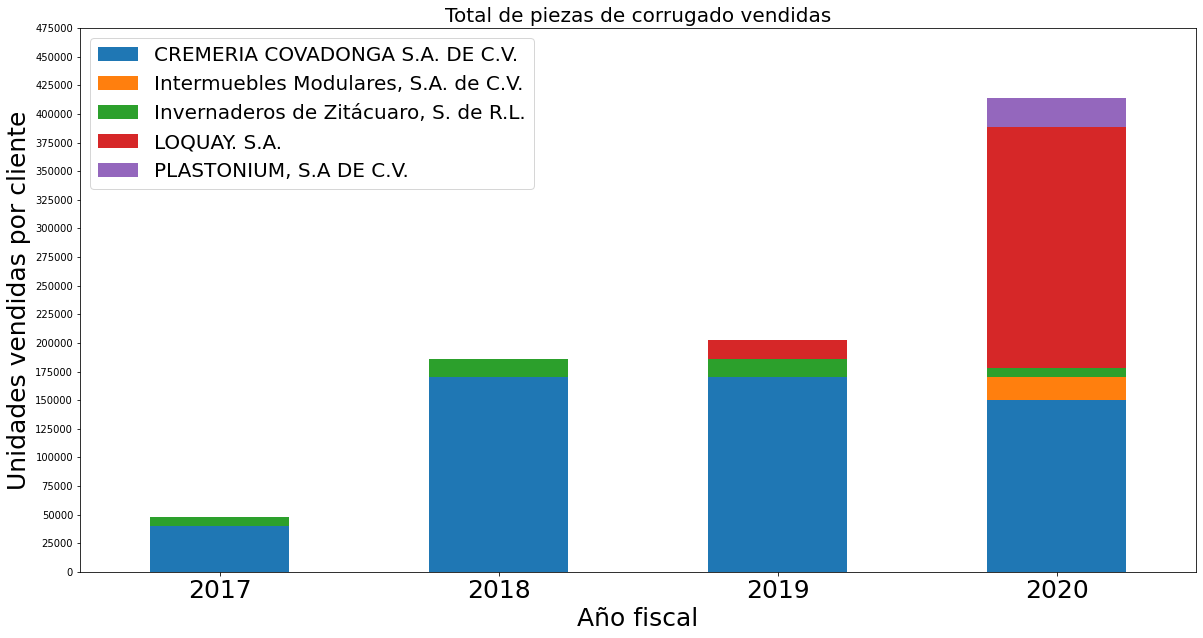

In [6]:
ax = ventasClienteTotalUnidades.plot(kind="bar", stacked=True, figsize=(20, 10))
ax.set_xticklabels(ventasClienteTotalUnidades.index, fontsize=25, rotation=0)
plt.yticks(np.arange(0, 500000, 25000))
ax.set_ylabel('Unidades vendidas por cliente', fontsize=25)
ax.set_xlabel('Año fiscal', fontsize=25)
ax.set_title('Total de piezas de corrugado vendidas', fontsize=20);
plt.legend(('CREMERIA COVADONGA S.A. DE C.V.', 'Intermuebles Modulares, S.A. de C.V.', 'Invernaderos de Zitácuaro, S. de R.L.','LOQUAY. S.A.', 'PLASTONIUM, S.A DE C.V.'), fontsize=20, loc='upper left');
# Exportamos la imagen para recursos

plt.savefig("../recursos/piezasVendidas.png")

In [7]:
# Realizamos la agrupación por usuario, el año de venta y sumando el monto total en pesos.

ventasClienteMonto = df.groupby(['Usuario.razonSocial', df['fechaEmision'].dt.year])['Productos.importe'].sum()
ventasClienteMonto

Usuario.razonSocial                    fechaEmision
CREMERIA COVADONGA S.A. DE C.V.        2017             488100.0
                                       2018            2074425.0
                                       2019            2074425.0
                                       2020            1830375.0
Intermuebles Modulares, S.A. de C.V.   2019              23700.0
                                       2020             967575.0
Invernaderos de Zitácuaro, S. de R.L.  2017             144600.0
                                       2018             289200.0
                                       2019             289200.0
                                       2020             144600.0
LOQUAY. S.A.                           2019              98813.0
                                       2020            1356445.0
PLASTONIUM, S.A DE C.V.                2020             270935.0
Name: Productos.importe, dtype: float64

In [8]:
# Desapilamos el dataframe con el metodo .unstack() para visualizar los montos de venta totales por año por cliente 
# convirtiendo los NaN resultado de productos no comprados por los clientes en 0

ventasClienteTotalventa = ventasClienteMonto.unstack(0).fillna(0)
ventasClienteTotalventa

Usuario.razonSocial,CREMERIA COVADONGA S.A. DE C.V.,"Intermuebles Modulares, S.A. de C.V.","Invernaderos de Zitácuaro, S. de R.L.",LOQUAY. S.A.,"PLASTONIUM, S.A DE C.V."
fechaEmision,,,,,
2017,488100.0,0.0,144600.0,0.0,0.0
2018,2074425.0,0.0,289200.0,0.0,0.0
2019,2074425.0,23700.0,289200.0,98813.0,0.0
2020,1830375.0,967575.0,144600.0,1356445.0,270935.0


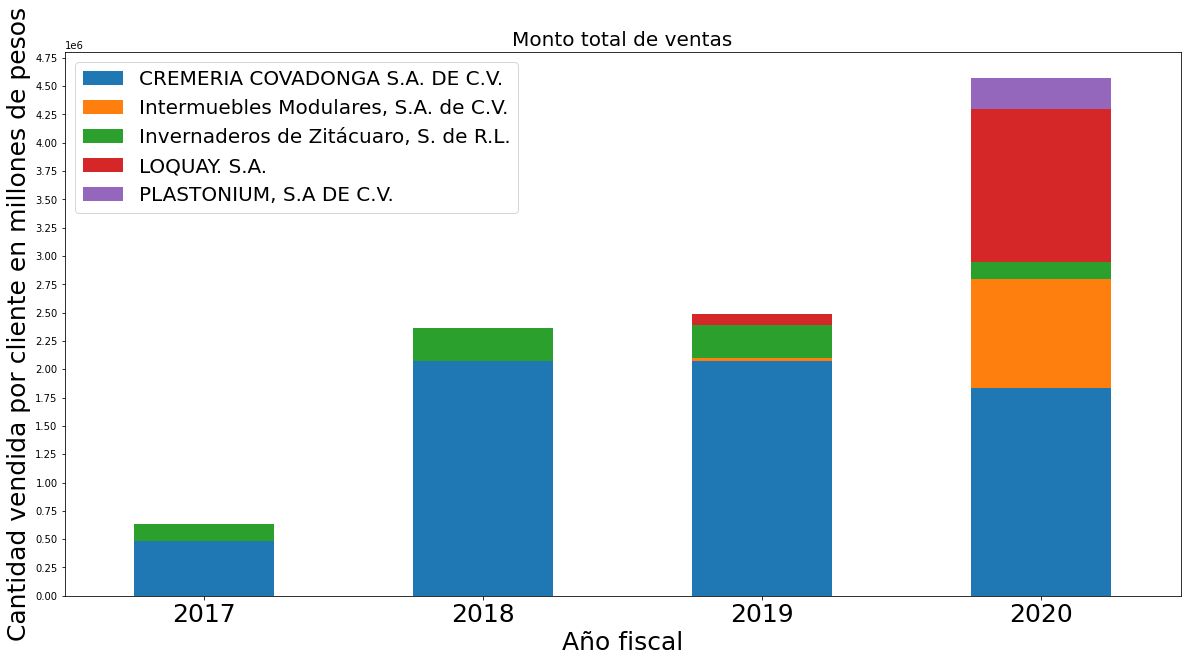

In [9]:
ax = ventasClienteTotalventa.plot(kind="bar", stacked=True, figsize=(20, 10))
ax.set_xticklabels(ventasClienteTotalventa.index, fontsize=25, rotation=0)
plt.yticks(np.arange(0, 5000000, 250000))
ax.set_ylabel('Cantidad vendida por cliente en millones de pesos', fontsize=25)
ax.set_xlabel('Año fiscal', fontsize=25)
ax.set_title('Monto total de ventas', fontsize=20);
plt.legend(('CREMERIA COVADONGA S.A. DE C.V.', 'Intermuebles Modulares, S.A. de C.V.', 'Invernaderos de Zitácuaro, S. de R.L.','LOQUAY. S.A.', 'PLASTONIUM, S.A DE C.V.'), fontsize=20, loc='upper left');
# Exportamos la imagen para recursos

plt.savefig("../recursos/montoVendido.png")

In [10]:
4000000*.02

80000.0